In [ ]:
try:
    import google.colab
    !pip install diffusers==0.30.0 transformers accelerate scipy omegaconf dotenv loguru
except:
    pass

In [2]:
import os
import torch
import urllib.request

from transformers import pipeline
from diffusers import StableDiffusionPipeline
from pathlib import Path

/Users/tweks/Applications/mambaforge/envs/sae-sd/lib/python3.10/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/Users/tweks/Applications/mambaforge/envs/sae-sd/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <0B7EB158-53DC-3403-8A49-22178CAB4612> /Users/tweks/Applications/mambaforge/envs/sae-sd/lib/python3.10/site-packages/torchvision/image.so
  Reason: tried: '/Users/tweks/Applications/mambaforge/envs/sae-sd/lib/python3.10/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/tweks/Applications/mambaforge/envs/sae-sd/lib/python3.10/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/tweks/Applications/mambaforge/envs/sae-sd/lib/python3.10/lib-dynload/../../libjpeg.9.dylib' (no such file), '/Users/tweks/Applications/mambaforge/envs/sae-sd/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on using image 

In [19]:
working_dir = Path(os.getcwd())
root_dir = Path(os.getcwd()).parent
try:
    import google.colab
    !git clone https://github.com/tweks/sae-sd.git
    root_dir = Path(os.path.join(os.getcwd(), 'sae-sd'))
    working_dir = Path('sae-sd/model')
except:
    pass
(working_dir, root_dir)

(PosixPath('/Users/tweks/Developer/sae-sd/model'),
 PosixPath('/Users/tweks/Developer/sae-sd'))

In [4]:
model_url = 'https://github.com/tweks/sae-sd/releases/download/model-v0.0.1/12288_768_TopKReLU_64_False_False_0.0_CC3M_15_train_target_223758458_768.pt'
model_path = working_dir/'data'/os.path.basename(model_url)
if not os.path.exists(model_path):
    urllib.request.urlretrieve(model_url, working_dir/'data'/os.path.basename(model_url))

In [5]:
pipe = StableDiffusionPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", torch_dtype= torch.float32)
device = "cuda" if torch.cuda.is_available() else "cpu"
seed = 0
pipe = pipe.to(device)

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [6]:
clip = pipeline(
   task="zero-shot-image-classification",
   model="openai/clip-vit-base-patch32",
   torch_dtype=torch.float32,
   device=device,
)

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.50, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


In [7]:
prompt = "a photo of an astronaut riding a horse on mars"

In [8]:
prompt_embed = pipe.encode_prompt(prompt, device=device, num_images_per_prompt=1, do_classifier_free_guidance=True)[0]
prompt_embed.shape

torch.Size([1, 77, 768])

  0%|          | 0/50 [00:00<?, ?it/s]

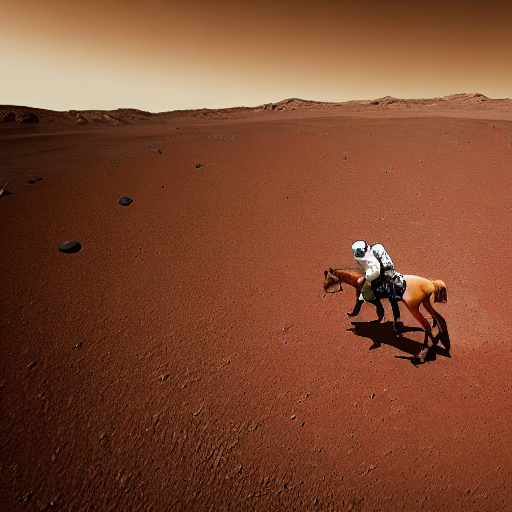

In [9]:
generator = torch.Generator(device).manual_seed(seed)
original_image = pipe(prompt_embeds=prompt_embed, generator=generator).images[0]
original_image 

In [28]:
import sys
if str(root_dir) not in sys.path:
    sys.path.append(str(root_dir))
import json
import numpy as np
from model.models import load_model

In [30]:
model, dataset_normalize, dataset_target_norm, dataset_mean = load_model(str(working_dir/"data/12288_768_TopKReLU_64_False_False_0.0_CC3M_15_train_target_223758458_768.pt"))
model.eval()
model, dataset_normalize, dataset_target_norm, dataset_mean.shape

/Users/tweks/Developer/sae-sd/model/models.py:787: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_state_dict = torch.load(


(Autoencoder(
   (activation): TopK(
     k=64, act_fn=ReLU(), use_abs=False
     (act_fn): ReLU()
   )
   (latent_soft_cap): Identity()
 ),
 False,
 27.712812921102035,
 torch.Size([768]))

In [31]:
ds_info = json.load(open(working_dir/"data/CC3M_15_train_target_sds_train_dataset_metadata.json"))
ds_info.keys()

dict_keys(['class_name', 'dtype', 'vector_size', 'len', 'mean_center', 'target_norm', 'scaling_factor', 'data_path', 'seq_len', 'use_lens', 'seq_id', 'mean'])

In [32]:
dataset_scaling_factor = ds_info["scaling_factor"]
lenses = None
seq_id = 0
seq_len = 0
dataset_scaling_factor

1.0926562485876634

In [33]:
def process_data(data: np.ndarray | torch.Tensor, idx: int | None=None) -> torch.Tensor:
    """Process data into the correct format."""
    X = data.to(torch.float32)
    X.sub_(dataset_mean)
    X.mul_(dataset_scaling_factor)

    if lenses is not None and idx is not None:
        current_seq_id = idx % seq_len
        if current_seq_id != seq_id:
            lens = lenses[current_seq_id]
            X = lens(X)

    return X

def invert_preprocess(data: torch.Tensor, idx: int | None=None) -> torch.Tensor:
    """Inverse process data."""
    if lenses is not None and idx is not None:
        current_seq_id = idx % seq_len
        if current_seq_id != seq_id:
            lens = lenses[current_seq_id]
            X = lens.invert(data)
        else:
            X = data
    else:
        X = data

    X.div_(dataset_scaling_factor)
    X.add_(dataset_mean)

    return X

In [34]:
prompt_embed_to_sae = prompt_embed.squeeze(0)
prompt_embed_to_sae.shape

torch.Size([77, 768])

In [35]:
prompt_embed_to_sae_pre = process_data(prompt_embed_to_sae)
prompt_embed_to_sae_post = invert_preprocess(prompt_embed_to_sae_pre)
prompt_embed_to_sae_post.shape, prompt_embed_to_sae_post.shape, torch.allclose(prompt_embed_to_sae, prompt_embed_to_sae_post, atol=1e-5)

(torch.Size([77, 768]), torch.Size([77, 768]), True)

In [37]:
concepts = []
with open(working_dir/"data/clip_disect_20k.txt") as f:
    concepts = [line.strip() for line in f.readlines()]

In [38]:
idx = concepts.index("horse")
a = pipe.encode_prompt(concepts[idx], device=device, num_images_per_prompt=1, do_classifier_free_guidance=True)[0]
a = a.squeeze(0)
a_proc = process_data(a)
with torch.no_grad():
    _, latents, _ = model.encode(a_proc)
for latent in latents[1:10]:
    nonzero_values = latent[latent != 0]
    nonzero_indices = latent.nonzero().squeeze()
    sorted_values, sort_indices = torch.sort(nonzero_values, descending=True)
    sorted_indices = nonzero_indices[sort_indices]
    print("Sorted values:", {v.item():f"{i.item():.4f}" for v,i in zip(sorted_indices, sorted_values)})
print("----------------------------------")
        

Sorted values: {1825: '10.6824', 3678: '9.5770', 12214: '7.4469', 3232: '6.4037', 5722: '5.8637', 4136: '5.6067', 9515: '4.9997', 8542: '3.9340', 5482: '3.6375', 4685: '3.4531', 7513: '3.1126', 4112: '2.6551', 11265: '2.3089', 24: '2.2262', 3673: '2.2154', 6688: '2.1826', 2246: '2.0771', 3446: '2.0756', 2148: '2.0297', 7928: '2.0287', 9410: '1.9336', 9139: '1.8889', 11446: '1.8828', 9826: '1.8629', 3204: '1.8561', 7210: '1.8114', 2064: '1.8011', 12090: '1.7187', 11964: '1.6889', 12210: '1.6810', 10604: '1.6625', 2336: '1.6535', 325: '1.6473', 187: '1.6316', 11367: '1.6102', 8270: '1.5860', 4198: '1.5822', 7945: '1.5719', 4963: '1.5544', 1675: '1.5538', 498: '1.5496', 10408: '1.5469', 9478: '1.5317', 5956: '1.5235', 685: '1.4997', 8050: '1.4897', 11870: '1.4795', 10866: '1.4794', 4089: '1.4776', 5444: '1.4699', 9590: '1.4696', 3685: '1.4667', 326: '1.4418', 5267: '1.4201', 534: '1.4102', 3653: '1.3927', 3791: '1.3783', 9563: '1.3588', 10982: '1.3261', 6467: '1.3158', 10690: '1.2857', 62

In [ ]:
with torch.no_grad():
    _, sae_latents, info = model.encode(prompt_embed_to_sae_pre)
    prompt_embed_to_sae_reconstructed = model.decode(sae_latents, info)
    print("Before modification", sae_latents[:,5722])
    sae_latents[:,5722] = 0
    prompt_embed_to_sae_reconstructed_modified = model.decode(sae_latents, info)

prompt_embed_to_sae_reconstructed_post = invert_preprocess(prompt_embed_to_sae_reconstructed)
diff = prompt_embed_to_sae - prompt_embed_to_sae_reconstructed_post
prompt_embed_to_sae_reconstructed_post_modified = invert_preprocess(prompt_embed_to_sae_reconstructed_modified)

generator = torch.Generator(device).manual_seed(seed)
image_from_embed = pipe(prompt_embeds=(prompt_embed_to_sae_reconstructed_post_modified + diff).unsqueeze(0), generator=generator).images[0]
image_from_embed

Before modification tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9827, 1.0451, 1.1550, 4.6447,
        6.2782, 5.1288, 7.5422, 7.4933, 7.5121, 7.5330, 7.5685, 7.6229, 7.6558,
        7.6924, 7.7145, 7.7285, 7.7588, 7.7804, 7.8028, 7.8244, 7.8349, 7.8573,
        7.8782, 7.8963, 7.9176, 7.9306, 7.9423, 7.9614, 7.9791, 7.9971, 8.0095,
        8.0133, 8.0276, 8.0338, 8.0363, 8.0470, 8.0534, 8.0637, 8.0673, 8.0732,
        8.0771, 8.0873, 8.0916, 8.0843, 8.0838, 8.0734, 8.0813, 8.0803, 8.0908,
        8.0964, 8.0925, 8.0950, 8.0851, 8.0924, 8.0921, 8.0884, 8.1026, 8.0907,
        8.0961, 8.0970, 8.0953, 8.1031, 8.0934, 8.0991, 8.1018, 8.0969, 8.1047,
        8.1000, 8.1135, 8.1084, 8.1025, 8.0909])


  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
original_image
labels = ["an image containing a horse", "an image without a horse"]
original_predictions = clip(original_image, candidate_labels=labels)
modified_predictions = clip(image_from_embed, candidate_labels=labels)
print("Original image predictions:", original_predictions)
print("Modified image predictions:", modified_predictions)

Original image predictions: [{'score': 0.9208367466926575, 'label': 'a photo without a horse'}, {'score': 0.0791633203625679, 'label': 'a photo of a horse'}]
Modified image predictions: [{'score': 0.9877918362617493, 'label': 'a photo without a horse'}, {'score': 0.01220810879021883, 'label': 'a photo of a horse'}]


In [23]:
idx = concepts.index("green")
a = pipe.encode_prompt(concepts[idx], device=device, num_images_per_prompt=1, do_classifier_free_guidance=True)[0]
a = a.squeeze(0)
a_proc = process_data(a)
with torch.no_grad():
    _, latents, _ = model.encode(a_proc)
for latent in latents[1:10]:
    nonzero_values = latent[latent != 0]
    nonzero_indices = latent.nonzero().squeeze()
    sorted_values, sort_indices = torch.sort(nonzero_values, descending=True)
    sorted_indices = nonzero_indices[sort_indices]
    print("Sorted values:", {v.item():f"{i.item():.4f}" for v,i in zip(sorted_indices, sorted_values)})
print("----------------------------------")
        

Sorted values: {8170: '13.0583', 2649: '10.0814', 3678: '8.5498', 12214: '8.0398', 8542: '5.2337', 9515: '4.8389', 11889: '4.7554', 2148: '4.4864', 7283: '4.1035', 5247: '3.9300', 3232: '3.3864', 8892: '3.2351', 10254: '2.8712', 11168: '2.6567', 781: '2.6539', 6322: '2.5972', 6759: '2.5907', 759: '2.4796', 3556: '2.3791', 6688: '2.2732', 9139: '2.2705', 6906: '2.1567', 12098: '2.1140', 957: '2.0994', 3145: '2.0676', 2862: '1.9878', 4092: '1.8730', 947: '1.8711', 685: '1.8664', 1642: '1.8347', 2906: '1.8309', 6487: '1.8180', 12086: '1.7735', 4448: '1.7150', 3204: '1.6196', 10078: '1.5892', 2072: '1.5690', 2172: '1.5686', 11940: '1.5395', 9694: '1.5222', 5640: '1.4828', 7216: '1.4542', 5570: '1.4315', 3975: '1.4250', 7022: '1.4144', 6110: '1.4013', 11804: '1.3841', 5551: '1.3677', 6746: '1.3479', 1705: '1.3178', 9614: '1.3170', 737: '1.3098', 3582: '1.3090', 1253: '1.3035', 7822: '1.2933', 4755: '1.2790', 8090: '1.2729', 2765: '1.2580', 10510: '1.2537', 12254: '1.2380', 8987: '1.2355', 3

Before modification tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7961,
        0.1000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  0%|          | 0/50 [00:00<?, ?it/s]

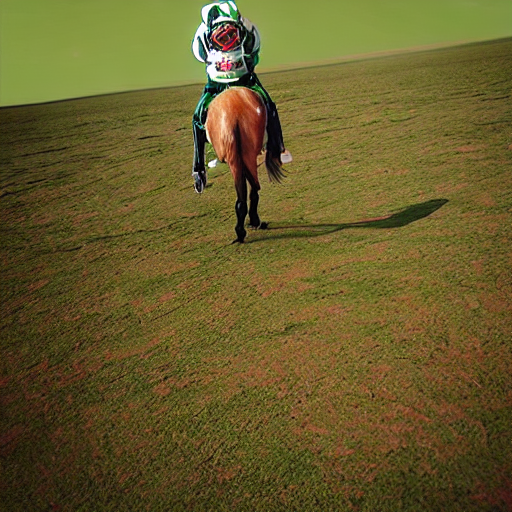

In [24]:
with torch.no_grad():
    _, sae_latents, info = model.encode(prompt_embed_to_sae_pre)
    prompt_embed_to_sae_reconstructed = model.decode(sae_latents, info)
    print("Before modification", sae_latents[:,2649])
    sae_latents[:,2649] = 9
    prompt_embed_to_sae_reconstructed_modified = model.decode(sae_latents, info)

prompt_embed_to_sae_reconstructed_post = invert_preprocess(prompt_embed_to_sae_reconstructed)
diff = prompt_embed_to_sae - prompt_embed_to_sae_reconstructed_post
prompt_embed_to_sae_reconstructed_post_modified = invert_preprocess(prompt_embed_to_sae_reconstructed_modified)

generator = torch.Generator(device).manual_seed(seed)
image_from_embed = pipe(prompt_embeds=(prompt_embed_to_sae_reconstructed_post_modified + diff).unsqueeze(0), generator=generator).images[0]
image_from_embed

In [25]:
original_image
labels = ["an image containing green", "an image without green"]
original_predictions = clip(original_image, candidate_labels=labels)
modified_predictions = clip(image_from_embed, candidate_labels=labels)
print("Original image predictions:", original_predictions)
print("Modified image predictions:", modified_predictions)

Original image predictions: [{'score': 0.7995169162750244, 'label': 'an image without green'}, {'score': 0.2004830688238144, 'label': 'an image containing green'}]
Modified image predictions: [{'score': 0.838009238243103, 'label': 'an image containing green'}, {'score': 0.16199076175689697, 'label': 'an image without green'}]


SAE ids which are not usable when interpeting the model

11114 padding connected

3678 beginning of the sentence